In [3]:
import sys
sys.path.append('/shareb/zliu/analysis/')
from CHARMtools import Cell3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import pybedtools

import imp
imp.reload(Cell3D)

from scipy.stats import pearsonr

ModuleNotFoundError: No module named 'pybedtools'

In [2]:
cellname = "mESCP1H3K27me3002"
cellname_enrich = "mESCP1H3K27me3EN002"
i = 0
path = "/shareb/zliu/analysis/CHARM/protocol_test/CHARM_final_7/sc/"
cell = Cell3D.Cell3D(cellname = cellname,tdg_path= path + f'processed/{cellname}/3d_info/clean.200k.{i}.3dg',resolution=200000)
cell.add_CpG_data("/share/home/zliu/share/Data/public/ref_genome/mouse_ref/M23/CpG/dipc_cpg/mm10.CpG.200000.txt")
cell.add_bed_data(path = path + f"processed/atac_all/{cellname_enrich}.atac.frag.bed.gz",column_name = "ATAC",type="all")
cell.add_bed_data(path = path + f"processed/ct_all/{cellname_enrich}.ct.frag.bed.gz",column_name = "CT",type="all")

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import interp1d
import numpy as np
import random
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d.art3d import Line3DCollection

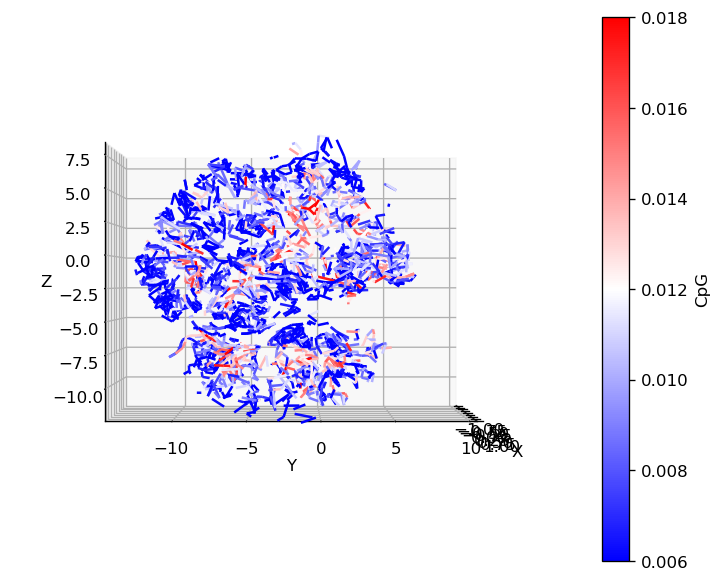

In [152]:
def plot_3d_chromosomes(data, color_column, cmap_name='bwr', color_norm=(None, None), figsize=(10, 6), dpi=120, smoothness=500):
    """
    绘制带有颜色映射的染色体3D图。

    参数:
        data (DataFrame): 包含染色体数据的DataFrame。
        color_column (str): 要用于颜色映射的列名称。
        cmap_name (str): 使用的颜色映射名称。
        color_norm (tuple): 颜色正规化的最小值和最大值，格式为(min, max)。
        figsize (tuple): 图的尺寸。
        dpi (int): 图的分辨率。
        smoothness (int): 线条平滑度。
    """

    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_subplot(111, projection='3d')

    # 设置颜色映射
    cmap = plt.cm.get_cmap(cmap_name)

    # 检查是否提供了颜色规范范围，如果没有，则根据数据计算
    if all(val is not None for val in color_norm):
        norm_min, norm_max = color_norm
    else:
        norm_min, norm_max = data[color_column].min(), data[color_column].max()

    norm = mcolors.Normalize(vmin=norm_min, vmax=norm_max)

    for chrom, chrom_df in data.groupby('chrom'):
        x = chrom_df['x'].to_numpy()
        y = chrom_df['y'].to_numpy()
        z = chrom_df['z'].to_numpy()

        # 计算每个段的长度
        t = np.zeros(x.shape)
        t[1:] = np.sqrt((x[1:] - x[:-1])**2 + (y[1:] - y[:-1])**2 + (z[1:] - z[:-1])**2).cumsum()

        # 插值
        fx = interp1d(t, x, kind='cubic')
        fy = interp1d(t, y, kind='cubic')
        fz = interp1d(t, z, kind='cubic')

        t_smooth = np.linspace(0, t.max(), num=smoothness)
        x_smooth, y_smooth, z_smooth = fx(t_smooth), fy(t_smooth), fz(t_smooth)

        # 获取颜色
        color_values = cmap(norm(chrom_df[color_column].to_numpy()))

        # 准备线段和颜色
        points = np.array([x_smooth, y_smooth, z_smooth]).T.reshape(-1, 1, 3)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        line_colors = [color_values[int(np.floor(i * len(color_values) / len(t_smooth)))] for i in range(len(t_smooth) - 1)]

        # 绘制线条
        lc = Line3DCollection(segments, colors=line_colors)
        ax.add_collection3d(lc)

    # 颜色条和标签
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ax=ax, label=color_column)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim(-1,1)
    ax.set_ylim(-14, 10)
    ax.set_zlim(-12, 8)
    ax.view_init(0, 0, 0)
    plt.show()

# 使用函数
plot_df = cell.get_data().query('chrom != "chrXa" & chrom != "chrXb"')
plot_df.loc[(plot_df['x'] < -1) | (plot_df['x'] > 1), 'CpG'] = np.nan
plot_3d_chromosomes(plot_df, 'CpG', color_norm=(0.006, 0.018)) 


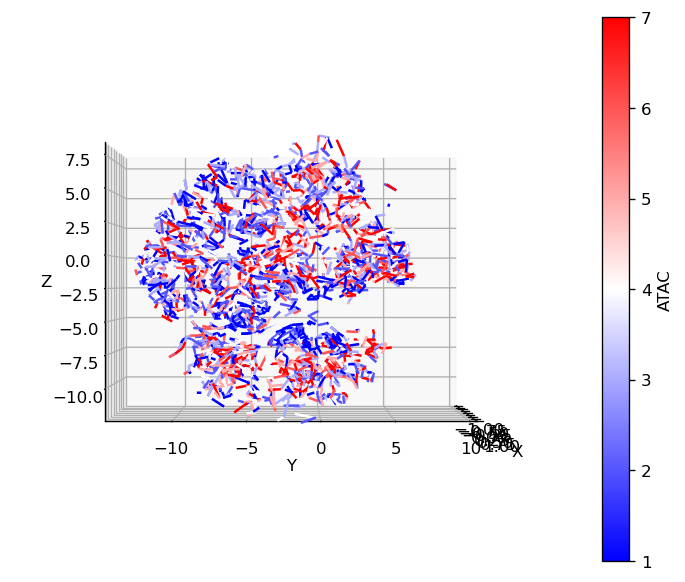

In [153]:
plot_df = cell.get_data().query('chrom != "chrXa" & chrom != "chrXb"')
vmin = np.quantile(plot_df['ATAC'], 0.1)
vmax = np.quantile(plot_df['ATAC'], 0.9)
plot_df.loc[(plot_df['x'] < -1) | (plot_df['x'] > 1), 'ATAC'] = np.nan
plot_3d_chromosomes(plot_df, 'ATAC', color_norm=(vmin, vmax)) 

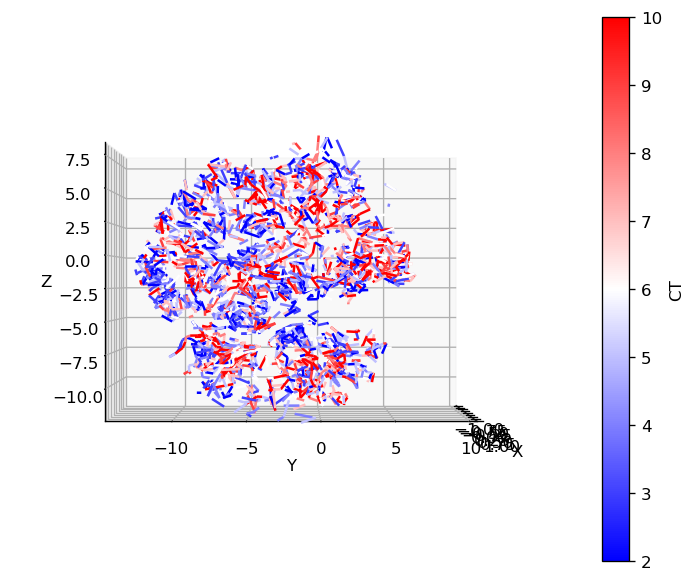

In [154]:
plot_df = cell.get_data().query('chrom != "chrXa" & chrom != "chrXb"')
vmin = np.quantile(plot_df['CT'], 0.1)
vmax = np.quantile(plot_df['CT'], 0.9)
plot_df.loc[(plot_df['x'] < -1) | (plot_df['x'] > 1), 'CT'] = np.nan
plot_3d_chromosomes(plot_df, 'CT', color_norm=(vmin, vmax)) 

ValueError: The number of derivatives at boundaries does not match: expected 1, got 0+0

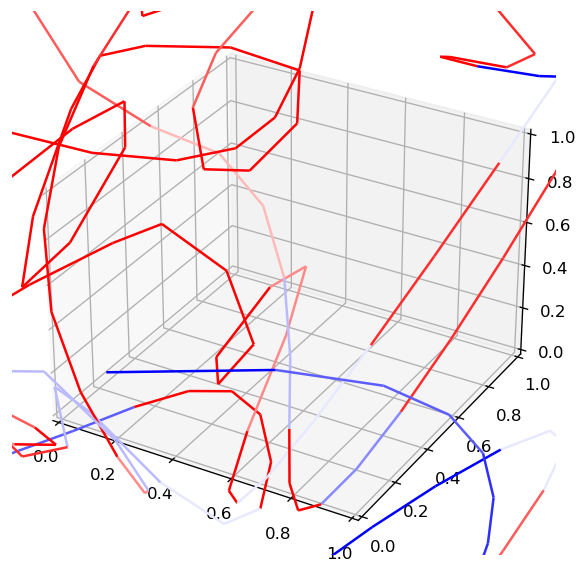

In [149]:
plot_df = cell.get_data().query('x>-1 & x < 1 & chrom != "chrXa" & chrom != "chrXb"')
vmin = np.quantile(plot_df['CT'], 0.1)
vmax = np.quantile(plot_df['CT'], 0.9)
plot_3d_chromosomes(plot_df, 'CT', color_norm=(vmin, vmax))

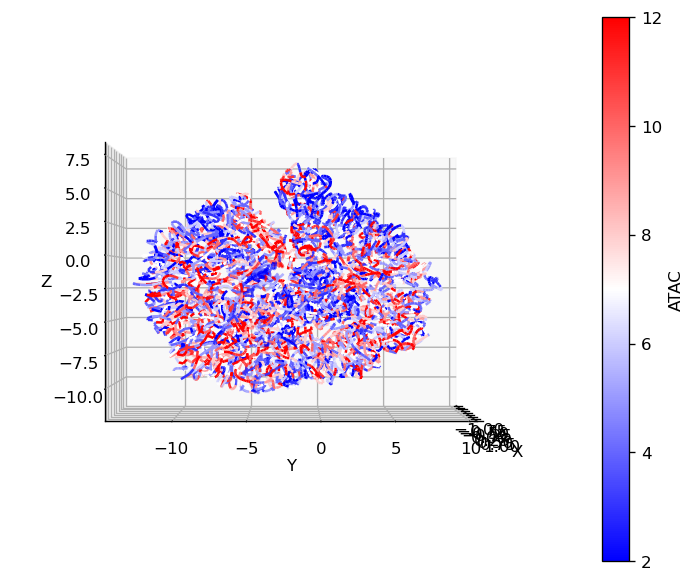

In [134]:
plot_df = cell.get_data().query('x>-1 & x < 1 & chrom != "chrXa" & chrom != "chrXb"')
vmin = np.quantile(plot_df['ATAC'], 0.1)
vmax = np.quantile(plot_df['ATAC'], 0.9)
plot_3d_chromosomes(plot_df, 'ATAC', color_norm=(vmin, vmax))

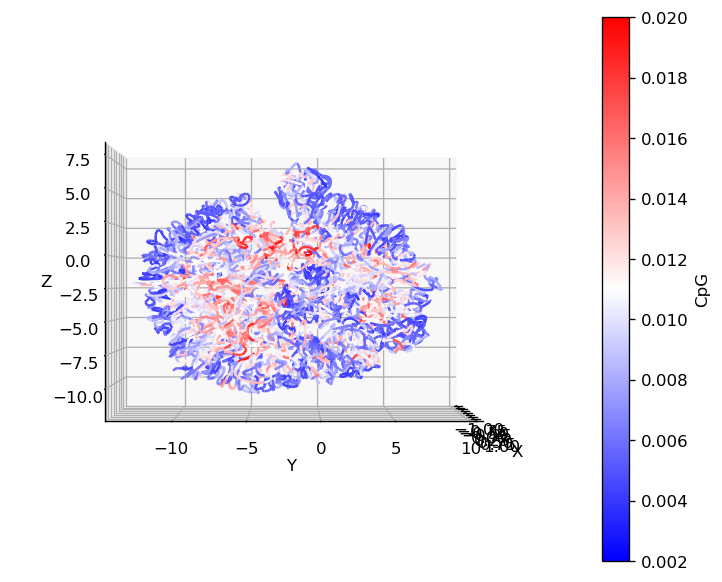

In [133]:
plot_df = cell.get_data().query('x>-1 & x < 1 & chrom != "chrXa" & chrom != "chrXb"')
plot_3d_chromosomes(plot_df, 'CpG', color_norm=(0.002, 0.020))

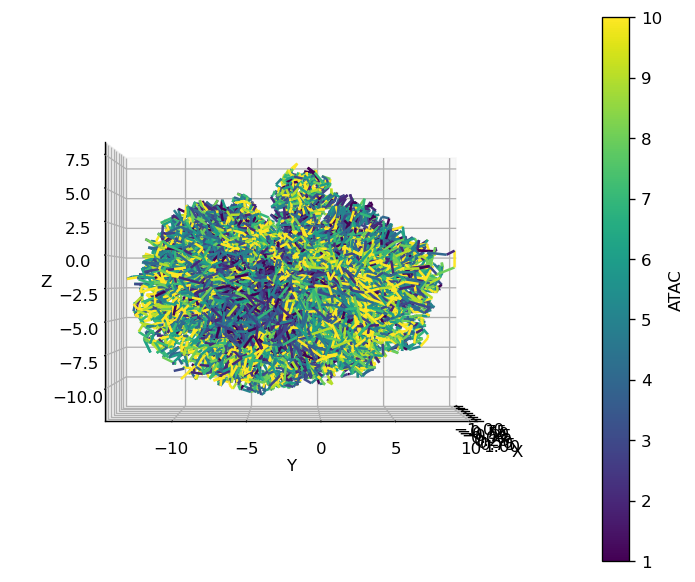

In [94]:
plot_df = cell.get_data().query('chrom != "chrXa" & chrom != "chrXb"')
plot_3d_chromosomes(plot_df, 'ATAC', color_norm=(1,10))

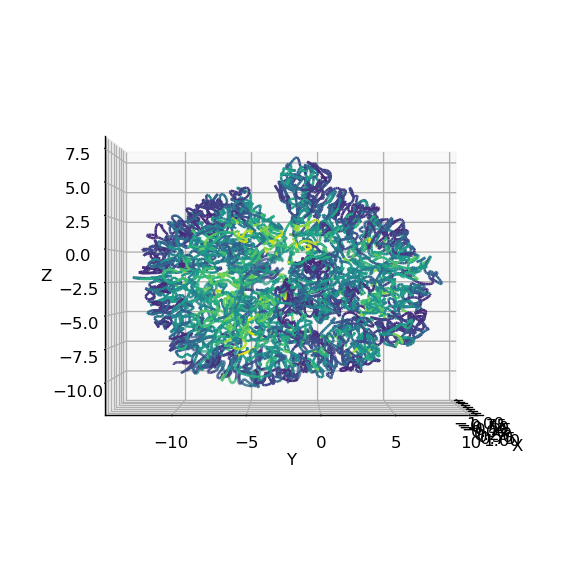

In [103]:
plot_df = cell.get_data().query('chrom != "chrXa" & chrom != "chrXb"')

fig = plt.figure( figsize=(6, 6),dpi=120)
ax = fig.add_subplot(111, projection='3d')

# 为CpG值定义一个颜色映射
# “CpG”值可能需要根据您的数据范围进行调整
cmap = plt.cm.get_cmap('viridis')  # 这里可以选择任何其他的颜色映射
norm = mcolors.Normalize(vmin=data['CpG'].min(), vmax=data['CpG'].max())  # 根据CpG值的最小/最大值进行归一化

# 对于数据集中的每个唯一染色体
for chrom, chrom_df in data.groupby('chrom'):
    x = chrom_df['x'].to_numpy()
    y = chrom_df['y'].to_numpy()
    z = chrom_df['z'].to_numpy()

    # 计算每个段的长度
    t = np.zeros(x.shape)
    t[1:] = np.sqrt((x[1:] - x[:-1])**2 + (y[1:] - y[:-1])**2 + (z[1:] - z[:-1])**2).cumsum()

    # 创建一个插值函数
    fx = interp1d(t, x, kind='cubic')
    fy = interp1d(t, y, kind='cubic')
    fz = interp1d(t, z, kind='cubic')

    # 创建一个平滑的t值用于插值函数
    t_smooth = np.linspace(0, t.max(), num=500)  # 可以调整num的值来改变平滑程度
    x_smooth, y_smooth, z_smooth = fx(t_smooth), fy(t_smooth), fz(t_smooth)

    # 根据CpG值获取颜色
    cpg_colors = cmap(norm(chrom_df['CpG'].to_numpy()))  # 将颜色映射应用于CpG值

    # 为每个段段绘制线条
    # for i in range(len(t_smooth) - 1):
    #     segment = ([x_smooth[i], x_smooth[i+1]], [y_smooth[i], y_smooth[i+1]], [z_smooth[i], z_smooth[i+1]])
    #     # CpG的颜色可能需要插值，因为我们有更多的t_smooth点比原始的CpG颜色点
    #     color_val = cpg_colors[int(np.floor(i * len(cpg_colors) / len(t_smooth)))]
    #     ax.plot(*segment, color=color_val)
    
    # 准备用于Line3DCollection的点对
    points = np.array([x_smooth, y_smooth, z_smooth]).T.reshape(-1, 1, 3)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # 计算每个线段的颜色
    line_colors = np.array([
        cpg_colors[int(np.floor(i * len(cpg_colors) / len(t_smooth)))]
        for i in range(len(t_smooth) - 1)
    ])

    # 创建一个Line3DCollection
    lc = Line3DCollection(segments, colors=line_colors)

    # 将线条添加到图中
    ax.add_collection3d(lc)


# 添加颜色条，展示CpG值与颜色的对应关系
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
#plt.colorbar(sm, ax=ax, label='CpG')

# 设置图形的标签和标题
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
#plt.title('3D plot of chromosomal positions colored by CpG values')

ax.view_init(0, 0, 0)

#xlim 
#ax.set_xlim(0, 2000000)
ax.set_ylim(-14, 10)
ax.set_zlim(-12, 8)
ax.set_xlim(-1,1)

plt.show()  # 展示图形


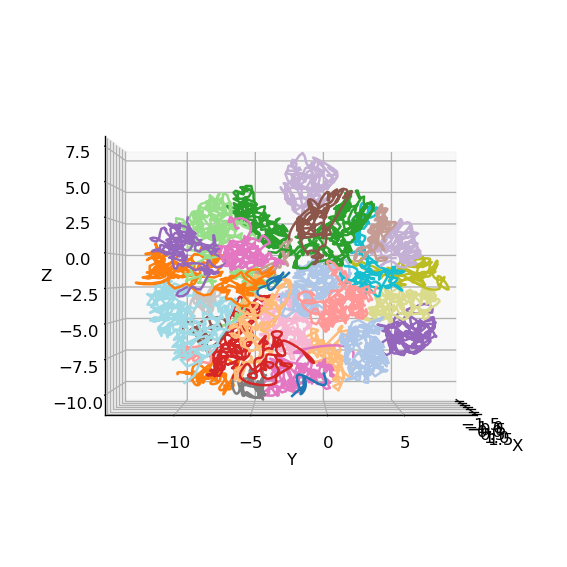

In [62]:
data = plot_df

# 创建3D图形
fig = plt.figure( figsize=(6, 6),dpi=120)
ax = fig.add_subplot(111, projection='3d')

# 获取一组较大的不连续的颜色列表
colors = plt.cm.tab20.colors  # 'tab20' colormap 包含20种不同的颜色
#random.shuffle(colors)  # 如果想要颜色随机分配，可以打乱顺序

# 为每个染色体编码创建颜色字典，确保每个染色体的颜色都不同
chrom_codes = data['chrom_code'].unique()
color_dict = {code: colors[i % len(colors)] for i, code in enumerate(chrom_codes)}

# 对于数据集中的每个唯一染色体
for chrom, chrom_df in data.groupby('chrom'):
    x = chrom_df['x'].to_numpy()
    y = chrom_df['y'].to_numpy()
    z = chrom_df['z'].to_numpy()

    # 计算每个段的长度
    t = np.zeros(x.shape)
    t[1:] = np.sqrt((x[1:] - x[:-1])**2 + (y[1:] - y[:-1])**2 + (z[1:] - z[:-1])**2).cumsum()

    # 创建一个插值函数
    fx = interp1d(t, x, kind='cubic')
    fy = interp1d(t, y, kind='cubic')
    fz = interp1d(t, z, kind='cubic')

    # 创建一个平滑的t值用于插值函数
    t_smooth = np.linspace(0, t.max(), num=300)  # 可以调整num的值来改变平滑程度
    x_smooth, y_smooth, z_smooth = fx(t_smooth), fy(t_smooth), fz(t_smooth)

    # 获取对应的颜色
    chrom_color = color_dict[chrom_df['chrom_code'].iloc[0]]

    ax.plot(x_smooth, y_smooth, z_smooth, label=chrom, color=chrom_color)  # 画出每个染色体的平滑线条

#ax.legend()  # 添加图例

# 设置图形的标签和标题
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
#plt.title('3D plot of chromosomal positions with distinct colors')

ax.view_init(0, 0, 0)
plt.show()  # 展示图


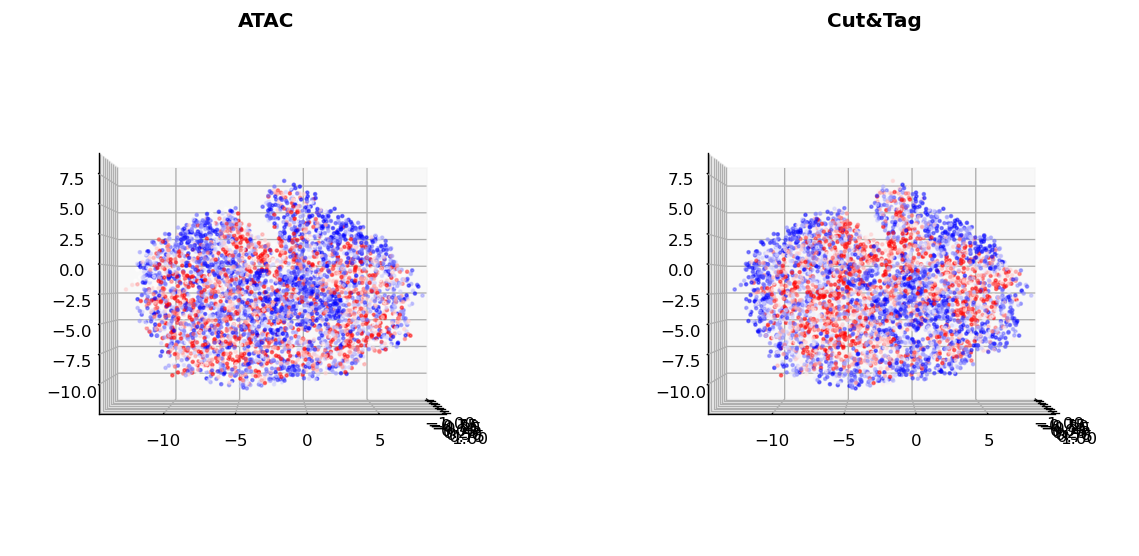

In [3]:
plot_df = cell.get_data().query('x > -1 & x < 1 & chrom != "chrXa" & chrom != "chrXb"')

fig,axes = plt.subplots(figsize=(12, 6),ncols=2, subplot_kw={'projection': '3d'},dpi=120)
ax = axes[0]
cmap = plt.get_cmap('viridis')
v01 = np.quantile(plot_df["ATAC"], 0.1)
v09 = np.quantile(plot_df["ATAC"], 0.9)

ax.scatter(plot_df.x, plot_df.y, plot_df.z, c=plot_df.ATAC, cmap="bwr",alpha=0.5,s=3,vmin = v01, vmax = v09)
ax.view_init(0, 0, 0)
# add subtitle
ax.set_title("ATAC", fontsize=12, fontweight='bold')

ax = axes[1]
v01 = np.quantile(plot_df["CT"], 0.1)
v09 = np.quantile(plot_df["CT"], 0.9)
ax.scatter(plot_df.x, plot_df.y, plot_df.z, c=plot_df.CT, cmap="bwr",alpha=0.5,s=3, vmin = v01, vmax = v09)
ax.view_init(0, 0, 0)
ax.set_title("Cut&Tag", fontsize=12, fontweight='bold')
plt.show()

In [14]:
cellname = "mESCP1H3K27me3004"
cellname_enrich = "mESCP1H3K27me3EN004"
i = 0
path = "/shareb/zliu/analysis/CHARM/protocol_test/CHARM_final_7/sc/"
cell20k = Cell3D.Cell3D(cellname = cellname,tdg_path= path + f'processed/{cellname}/3d_info/clean.20k.{i}.3dg',resolution=20000)
cell20k.add_CpG_data("/share/home/zliu/share/Data/public/ref_genome/mouse_ref/M23/CpG/dipc_cpg/mm10.CpG.20000.txt")
cell20k.add_bed_data(path = path + f"processed/atac_all/{cellname_enrich}.atac.frag.bed.gz",column_name = "ATAC",type="all")
cell20k.add_bed_data(path = path + f"processed/ct_all/{cellname_enrich}.ct.frag.bed.gz",column_name = "CT",type="all")

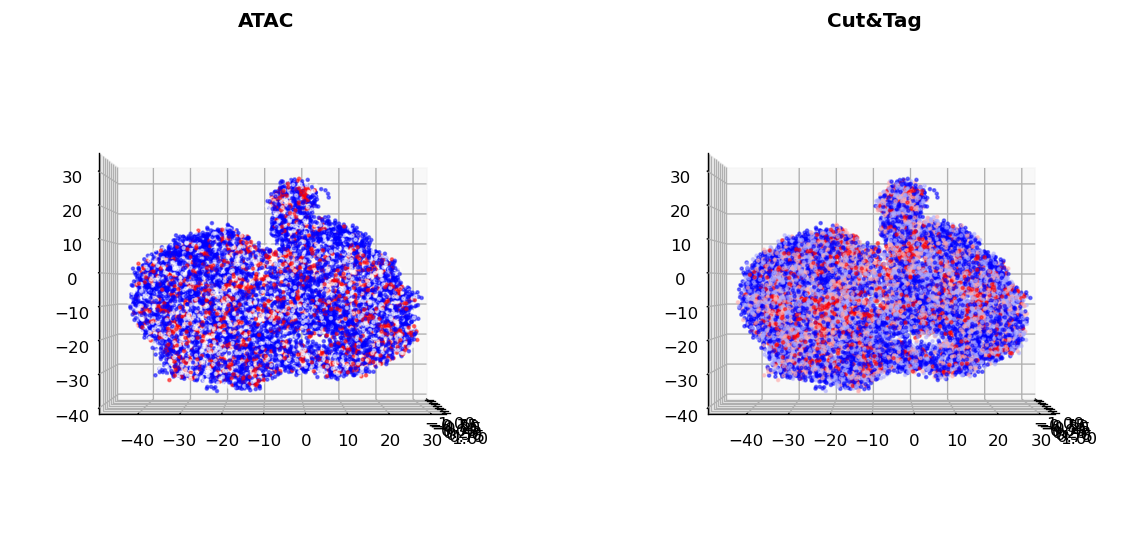

In [21]:
plot_df = cell20k.get_data().query('x > -1 & x < 1 & chrom != "chrXa" & chrom != "chrXb"')

fig,axes = plt.subplots(figsize=(12, 6),ncols=2, subplot_kw={'projection': '3d'},dpi=120)
ax = axes[0]
cmap = plt.get_cmap('viridis')
v01 = np.quantile(plot_df["ATAC"], 0.1)
v09 = np.quantile(plot_df["ATAC"], 0.9)

ax.scatter(plot_df.x, plot_df.y, plot_df.z, c=plot_df.ATAC, cmap="bwr",alpha=0.5,s=3,vmin = v01, vmax = v09)
ax.view_init(0, 0, 0)
# add subtitle
ax.set_title("ATAC", fontsize=12, fontweight='bold')

ax = axes[1]
v01 = np.quantile(plot_df["CT"], 0.1)
v09 = np.quantile(plot_df["CT"], 0.9)
ax.scatter(plot_df.x, plot_df.y, plot_df.z, c=plot_df.CT, cmap="bwr",alpha=0.5,s=3, vmin = v01, vmax = v09)
ax.view_init(0, 0, 0)
ax.set_title("Cut&Tag", fontsize=12, fontweight='bold')
plt.show()

PearsonRResult(statistic=0.383146348988501, pvalue=0.0)


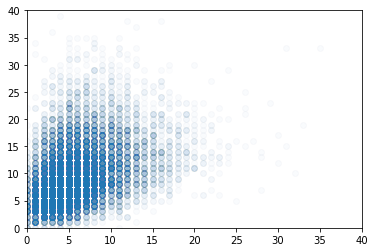

In [18]:
df = cell.get_data()
plt.scatter(x=df.ATAC,y=df.CT,alpha=0.01)
plt.ylim(0,40)
plt.xlim(0,40)
print(pearsonr(df.ATAC,df.CT))

PearsonRResult(statistic=0.255851047428531, pvalue=0.0)


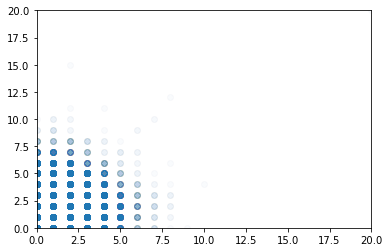

In [20]:
df = cell20k.get_data()
plt.scatter(x=df.ATAC,y=df.CT,alpha=0.01)
plt.ylim(0,20)
plt.xlim(0,20)
print(pearsonr(df.ATAC,df.CT))